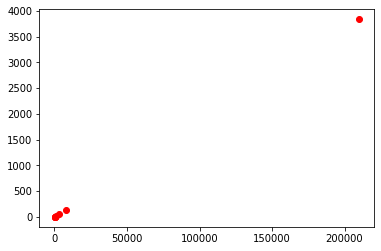

In [9]:
import numpy as np 
import matplotlib.pyplot as plt

# i = np.arange(5, 20, 5)
# size_len = i**3

i       = np.array([5, 6, 7, 8, 10, 15, 210000**(1/3), 20])
time_np = np.array([1.03, 2.07, 3.76, 5.98, 12.50, 52.03, 64*60, 133.29]) # just in numpy array and on cpu, no parallel
volexs  = i**3
time_taichi = np.array([])


fig = plt.figure()
ax = fig.gca()
ax.plot(volexs, time_np, 'ro')
plt.show()

In [12]:
from numba import jit, prange
@jit(nopython=True, fastmath=True, nogil=True,  parallel=True)
def bilinear_interpolation(f_in, resampleFactor):
    x_in = np.linspace(0, f_in.shape[0]-1, f_in.shape[0])
    y_in = np.linspace(0, f_in.shape[1]-1, f_in.shape[1])
    x_out = np.linspace(0, f_in.shape[0]-1, f_in.shape[0]*resampleFactor)
    y_out = np.linspace(0, f_in.shape[1]-1, f_in.shape[1]*resampleFactor)
    f_out = np.zeros((y_out.size, x_out.size))
    
    for i in prange(f_out.shape[1]):
        idx = np.searchsorted(x_in[2:-2], x_out[i])
        
        x1 = x_in[idx-1]
        x2 = x_in[idx]
        x = x_out[i]
        
        for j in prange(f_out.shape[0]):
            idy = np.searchsorted(y_in[2:-2], y_out[j])
            y1 = y_in[idy-1]
            y2 = y_in[idy]
            y = y_out[j]

            
            f11 = f_in[idy-1, idx-1]
            f21 = f_in[idy-1, idx]
            f12 = f_in[idy, idx-1]
            f22 = f_in[idy, idx]
            

            
            f_out[j, i] = ((f11 * (x2 - x) * (y2 - y) +
                            f21 * (x - x1) * (y2 - y) +
                            f12 * (x2 - x) * (y - y1) +
                            f22 * (x - x1) * (y - y1)) /
                           ((x2 - x1) * (y2 - y1)))
    
    return f_out

In [14]:
import numpy as np

test_array = np.linspace(0, 99, 10).reshape(5, 2)
print(test_array)
test_out = bilinear_interpolation(test_array, 3)
print(test_out)
    

[[ 0. 11.]
 [22. 33.]
 [44. 55.]
 [66. 77.]
 [88. 99.]]
[[ -0.           0.78571429   1.57142857   2.35714286   3.14285714
    3.92857143   4.71428571   5.5         25.14285714  28.28571429
   31.42857143  34.57142857  37.71428571  40.85714286  44.        ]
 [ 17.6         18.38571429  19.17142857  19.95714286  20.74285714
   21.52857143  22.31428571  23.1         42.74285714  45.88571429
   49.02857143  52.17142857  55.31428571  58.45714286  61.6       ]
 [ 35.2         35.98571429  36.77142857  37.55714286  38.34285714
   39.12857143  39.91428571  40.7         60.34285714  63.48571429
   66.62857143  69.77142857  72.91428571  76.05714286  79.2       ]
 [ 52.8         53.58571429  54.37142857  55.15714286  55.94285714
   56.72857143  57.51428571  58.3         77.94285714  81.08571429
   84.22857143  87.37142857  90.51428571  93.65714286  96.8       ]
 [ 70.4         71.18571429  71.97142857  72.75714286  73.54285714
   74.32857143  75.11428571  75.9         95.54285714  98.68571429
  

In [15]:
test_out.shape

(6, 15)

In [16]:
test_array.shape
    




(5, 2)